In [4]:
import numpy as np


class PCA:

    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None
        self.mean = None

    def fit(self, X):
        # mean centering
        self.mean = np.mean(X, axis=0)
        X = X -  self.mean

        # covariance, functions needs samples as columns
        cov = np.cov(X.T)

        # eigenvectors, eigenvalues
        eigenvectors, eigenvalues = np.linalg.eig(cov)

        # eigenvectors v = [:, i] column vector, transpose this for easier calculations
        eigenvectors = eigenvectors.T

        # sort eigenvectors
        idxs = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[idxs]
        eigenvectors = eigenvectors[idxs]

        self.components = eigenvectors[:self.n_components]

    def transform(self, X):
        X = X - self.mean
        return np.dot(X, self.components.T)

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


   
d0 = pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
print(d0.head(5)) 

# save the labels into a variable l.
l = d0['label']

# Drop the label feature and store the pixel data in d.
d = d0.drop("label",axis=1)

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         

In [6]:
print(d.shape)
print(l.shape)

(42000, 784)
(42000,)


In [14]:
pca=PCA(2)
pca.fit(d)
X_projected=pca.transform(d)

In [15]:
d.shape

(42000, 784)

In [16]:
X_projected.shape

(42000, 2)

In [17]:
x1=X_projected[:,0]
x2=X_projected[:,1]

In [18]:
x1

array([-5.69790348e+07-2.51434568e-13j,  7.69499330e+06+9.72083683e-12j,
       -4.82887561e+07-2.51434568e-13j, ...,
       -3.77821884e+07-2.51434568e-13j,  1.11244975e+08-2.51434568e-13j,
       -5.74889238e+06-1.78563017e-12j])

In [19]:
x2

array([-5.69785148e+07-2.51434568e-13j,  7.69551324e+06+9.72083683e-12j,
       -4.82882362e+07-2.51434568e-13j, ...,
       -3.77849999e+07-2.51434568e-13j,  1.11245495e+08-2.51434568e-13j,
       -5.74837243e+06-1.78563017e-12j])

/tmp/ipykernel_72052/1676511587.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(x1,x2,edgecolor='none',alpha=0.8,cmap=plt.cm.get_cmap('viridis',3))
/tmp/ipykernel_72052/1676511587.py:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x1,x2,edgecolor='none',alpha=0.8,cmap=plt.cm.get_cmap('viridis',3))


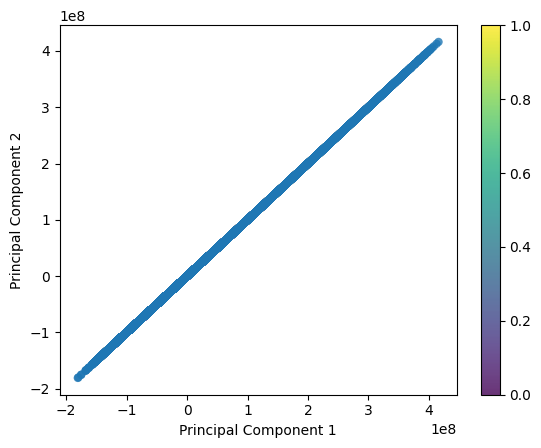

In [20]:
plt.scatter(x1,x2,edgecolor='none',alpha=0.8,cmap=plt.cm.get_cmap('viridis',3))
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar()
plt.show()